## Learn very simple params of a differential equation
### Latka Volterra for simplicity
$\frac{\partial x}{\partial t} = \alpha x - \beta x y$

$\frac{\partial y}{\partial t} = \gamma x y - \delta y$

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Parameters
a, b, c, d = 2/3, 4/3, 1, 1
dt = 0.08
x0, y0 = 1.2, 1.2
T = 1000

In [99]:
X = np.zeros(T)
Y = np.zeros(T)

# Init 
X[0], Y[0] = x0, y0

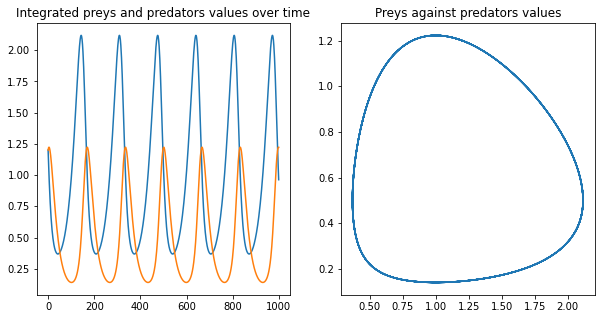

In [100]:
from scipy.integrate import odeint
ttt = np.linspace(0, 50, T)

plt.figure(figsize=(10,5))
plt.subplot(121)
def deriv_odeint(xy, t):
    x, y = xy
    return np.array([a*x - b*x*y, c*x*y - d*y])
plt.plot(odeint(deriv_odeint, [x0, y0], ttt));
plt.title("Integrated preys and predators values over time")

data = odeint(deriv_odeint, [x0,y0], ttt)
X, Y = data.T

plt.subplot(122)
plt.plot(X, Y)
plt.title("Preys against predators values");

## Learn with featured teacher forcing

In [77]:
# Features Functions
dFF = {'x': lambda d: d[0],
       'xy':lambda d: d[0]*d[1],
       'y': lambda d: d[1],
       'x^2': lambda d: d[0]**2,
       'y^2': lambda d: d[1]**2
}
FF = list(dFF.values())
nf = len(FF) # Number of features

In [78]:
# Parameters
Fl = 100
Tr = 300
Si = 600
Tt = Fl + Tr + Si

var_noise = 0.0001

In [79]:
# Sample
M = np.zeros((Tt, nf))

for i in range(1, Fl + Tr):
    noise = np.random.normal(0, var_noise, size=nf)
    M[i,:] =  np.array([f(data[i-1]) for f in FF])

In [80]:
# Learn
W_out = np.dot(np.linalg.pinv(M[Fl: Fl + Tr,:]), data[Fl: Fl + Tr,:])

In [81]:
# Simulate
Z = np.zeros((Tt, 2))
Z[:Fl + Tr, :] = data[: Fl + Tr] 
for i in range(Fl + Tr, Tt):
    M[i,:] =  np.array([f(Z[i-1]) for f in FF])
    Z[i,:] = np.dot(M[i,:], W_out)

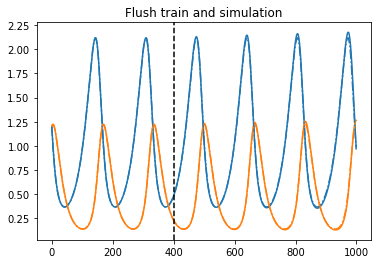

In [82]:
# Plot simulation
plt.gca().set_prop_cycle(color=['tab:blue','tab:orange','tab:blue','tab:orange'])
plt.plot(Z)
plt.plot(data, linestyle='-.')
plt.axvline(x=Fl+Tr, linestyle='--', color='black');
plt.title('Flush train and simulation');

In [83]:
for fname, fcoef in zip(dFF.keys(),np.round(W_out, 2)):
    print(fname, fcoef)
print(np.round(np.array([[a*dt + 1, -dt*b, 0],
              [0, dt*c, -dt*d+1]]),2))

x [ 1.04 -0.  ]
xy [-0.07  0.05]
y [-0.    0.95]
x^2 [-0.  0.]
y^2 [ 0. -0.]
[[ 1.05 -0.11  0.  ]
 [ 0.    0.08  0.92]]


# Notes
* Simulation works pretty well
* Obviously, this simple system have been learned by combination of features
* An ESN could be useful in case we have several different stages, (like going up and down, or being in a "8" double loop), we would need an information about former states to know in which stages we are (eg. going up or down) 
* Also check with input output way

## Same, but learning with an input (prey)

In [84]:
# Features Functions
dFF = {'x': lambda d: d[0],
       'xy':lambda d: d[0]*d[1],
       'y': lambda d: d[1],
       'x^2': lambda d: d[0]**2,
       'y^2': lambda d: d[1]**2
}
FF = list(dFF.values())
nf = len(FF) # Number of features

In [85]:
# Parameters
Fl = 100
Tr = 300
Si = 600
Tt = Fl + Tr + Si

var_noise = 0.0001

In [86]:
# Sample
M = np.zeros((Tt, nf))

for i in range(1, Fl + Tr):
    noise = np.random.normal(0, var_noise, size=nf)
    M[i,:] =  np.array([f(data[i-1]) for f in FF])

In [87]:
# Learn
W_out = np.dot(np.linalg.pinv(M[Fl: Fl + Tr,:]), data[Fl: Fl + Tr, 1:])

In [88]:
# Simulate
Z = np.zeros((Tt, 1))
Z[:Fl + Tr, :] = data[: Fl + Tr, 1:] 
for i in range(Fl + Tr, Tt):
    M[i,:] =  np.array([f(np.hstack((data[i-1, 0], Z[i-1]))) for f in FF])
    Z[i,:] = np.dot(M[i,:], W_out)

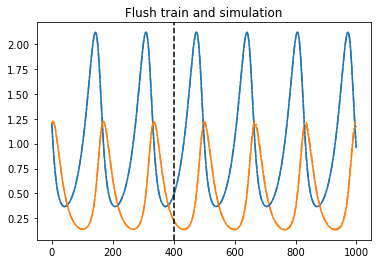

In [89]:
# Plot simulation
plt.gca().set_prop_cycle(color=['tab:blue','tab:orange','tab:blue','tab:orange'])
plt.plot(np.hstack((data[:,:1], Z)))
plt.plot(data, linestyle='-.')
plt.axvline(x=Fl+Tr, linestyle='--', color='black');
plt.title('Flush train and simulation');

In [92]:
for fname, fcoef in zip(dFF.keys(),np.round(W_out, 2)):
    print(f'{fname:<5}: {fcoef}')
print(np.round(np.array([[a*dt + 1, -dt*b, 0],
              [0, dt*c, -dt*d+1]]),2))

x    : [-0.]
xy   : [0.05]
y    : [0.95]
x^2  : [0.]
y^2  : [-0.]
[[ 1.05 -0.11  0.  ]
 [ 0.    0.08  0.92]]
